In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [21]:
def clean_df(df):
    df = df[df.caption != '']
    return df.reset_index(drop=True)

In [107]:
rev_dpath = '../data/outputs/reviews/'
        
rev_files = [rev_dpath+ f for f in os.listdir(rev_dpath)]
df_rev = pd.DataFrame()
for file in rev_files:
    
    df = pd.read_json(file)
    df_clean = clean_df(df)
    df_clean['place_id'] = file.split('_',1)[1]
    df_rev = pd.concat((df_rev, df_clean), ignore_index=True)

In [108]:
df_rev['place_id'] = df_rev['place_id'].str.replace('.json','')

In [32]:
rev_dpath = '../data/outputs/cbg_restaurants/'
        
rev_files = [rev_dpath+ f for f in os.listdir(rev_dpath)]
df_rest = pd.DataFrame()
for file in rev_files[:500]:
    
    df = pd.read_json(file)

    df_rest = pd.concat((df_rest, df), ignore_index=True)

In [83]:
short_pl_id = df_rev[df_rev['place_id'].str.len() < 27]['place_id'].to_list()
pl_id_rep = {}
for pl_id in short_pl_id:
    pl_id_rep[pl_id] = (df_rest[df_rest.place_id.str.startswith(pl_id)]['place_id'].unique())[0]

In [84]:
df_rev = df_rev.replace({"place_id": pl_id_rep})

In [113]:
df_join = df_rest.join(df_rev.set_index('place_id'),on = 'place_id',lsuffix='rest_', how='inner')

In [135]:
df_join.columns

Index(['business_status', 'geometry', 'icon', 'name', 'opening_hours',
       'photos', 'place_id', 'plus_code', 'reference', 'scope', 'types',
       'vicinity', 'ratingrest_', 'user_ratings_total', 'CBG', 'Radius',
       'price_level', 'permanently_closed', 'id_review', 'caption',
       'relative_date', 'retrieval_date', 'rating', 'username',
       'n_review_user', 'n_photo_user', 'url_user', 'census_block_group'],
      dtype='object')

In [137]:
x= df_join['id_review'].value_counts()
x[x>1]

ChZDSUhNMG9nS0VJQ0FnSUNzOUkzY0lREAE     8
ChZDSUhNMG9nS0VJQ0FnSURvanN2Y2VnEAE     8
ChdDSUhNMG9nS0VJQ0FnSURNazUtbnZ3RRAB    8
ChZDSUhNMG9nS0VJQ0FnSURNaXB5eGZBEAE     8
ChZDSUhNMG9nS0VJQ0FnSURpMHRHc1JnEAE     8
                                       ..
ChdDSUhNMG9nS0VJQ0FnSUN3MXFYYm1BRRAB    2
ChZDSUhNMG9nS0VJQ0FnSURRcVp1ZVR3EAE     2
ChZDSUhNMG9nS0VJQ0FnSURZb2FpSVVBEAE     2
ChZDSUhNMG9nS0VJQ0FnSURVX3BqbVVREAE     2
ChZDSUhNMG9nS0VJQ0FnSURBbnZyR01nEAE     2
Name: id_review, Length: 34186, dtype: int64

<AxesSubplot:>

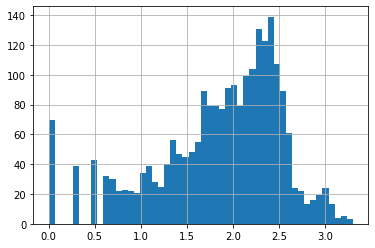

In [128]:
np.log10(df_join['place_id'].value_counts()).hist(bins=50)

In [138]:
df_join['rev_length'] = df_join.caption.str.len()

In [139]:
df_join[['rating','price_level','rev_length']].corr()

,rating,price_level,rev_length
rating,1.000000,0.086009,-0.215392
price_level,0.086009,1.000000,0.084490
rev_length,-0.215392,0.084490,1.000000


In [141]:
df_rest[df_rest.place_id=='ChIJCezJA4ptAHwRd5CueyvT0iw']['name']

2344    Crackin' Kitchen
2372    Crackin' Kitchen
Name: name, dtype: object

In [144]:
df_rest[df_rest['name'].str.contains('McD')]

AttributeError: 'Series' object has no attribute 'contains'